In [87]:
import matplotlib.pyplot as plt
import numpy as np

from mpltools import style
from mpltools import layout


In [88]:
def pos_neg_hist(y_pos: np.array, 
                 y_neg: np.array):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # left histogram for negative samples
    ax_left = ax.twiny()  # shared y axis
    ax_left.hist(y_pos, bins=50, orientation='horizontal', color='#1f77b4', alpha=0.7, density=True)
    ax_left.invert_xaxis()  # invert y axis
    ax_left.yaxis.set_label_position("left")
    ax_left.set_ylabel('y_pred')
    
    hard_thres = (max(y_pos)+min(y_neg))/2
    plt.axhline(y=hard_thres, color='red', linestyle='--', 
                label=f'Hard Threshold: {hard_thres.item()}')
    
    ax_right = ax.twinx()  # 共享x轴
    # right histogram for positive samples  
    ax_right.hist(y_neg, bins=50, orientation='horizontal', color='#ff7f0e', alpha=0.7, density=True)
    ax_right.yaxis.set_label_position("right")
    ax_right.set_ylabel('y_pred')

    ax_left.set_xlabel('y_true')
    ax_right.set_xlabel('y_true')
    ax.set_ylabel('y_pred')

    ax_right.grid(False)
    plt.title('Scatter Plot of Predictions vs True Values with Hard Threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # plt.savefig('/hkfs/work/workspace/scratch/cc7738-benchmark_tag/TAPE_chen/core/gcns/hah.png')
    return 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


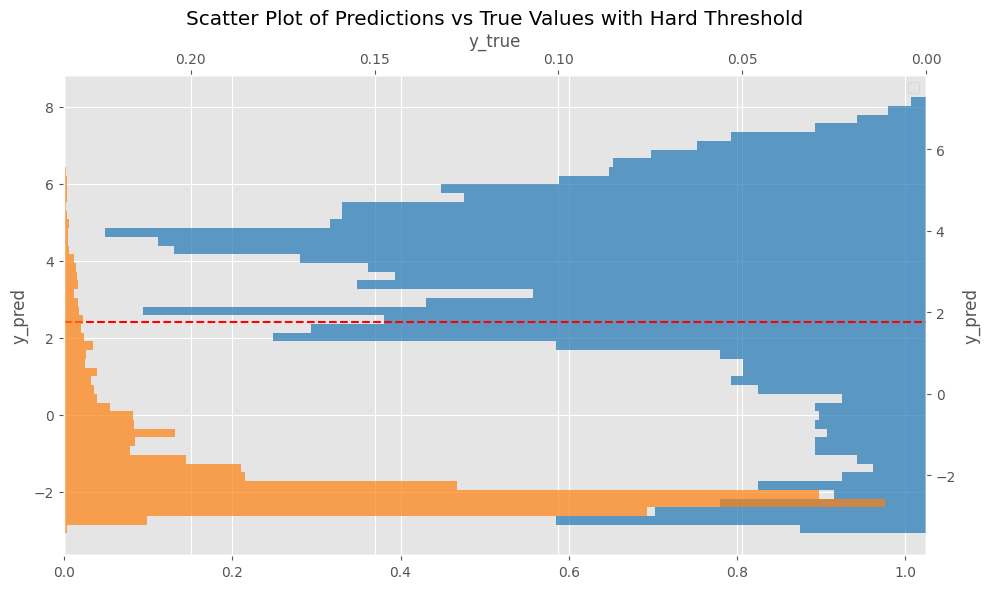

In [89]:
# 生成示例数据
data = np.load('/hkfs/work/workspace/scratch/cc7738-benchmark_tag/TAPE_chen/core/gcns/data_seal.npz')
y_pos = data['pos_pred']
y_neg = data['neg_pred']

norm = lambda x : (x - x.min()) / (x.max() - x.min())
norm1 = lambda x : (x - x.mean()) / x.std()

pos_neg_hist(y_pos, y_neg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


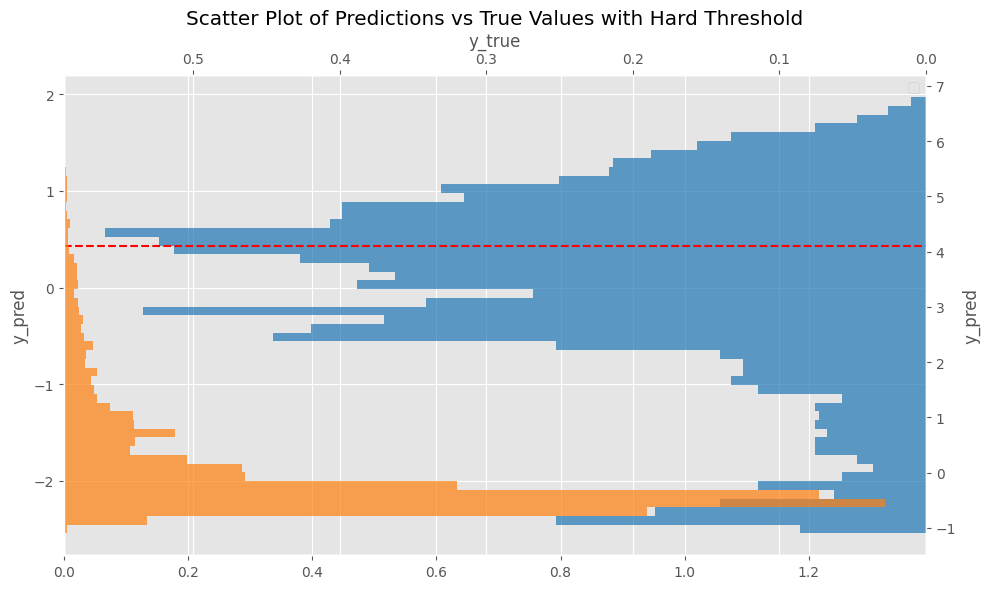

In [90]:
y_pos = norm1(y_pos)
y_neg = norm1(y_neg)

pos_neg_hist(y_pos, y_neg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


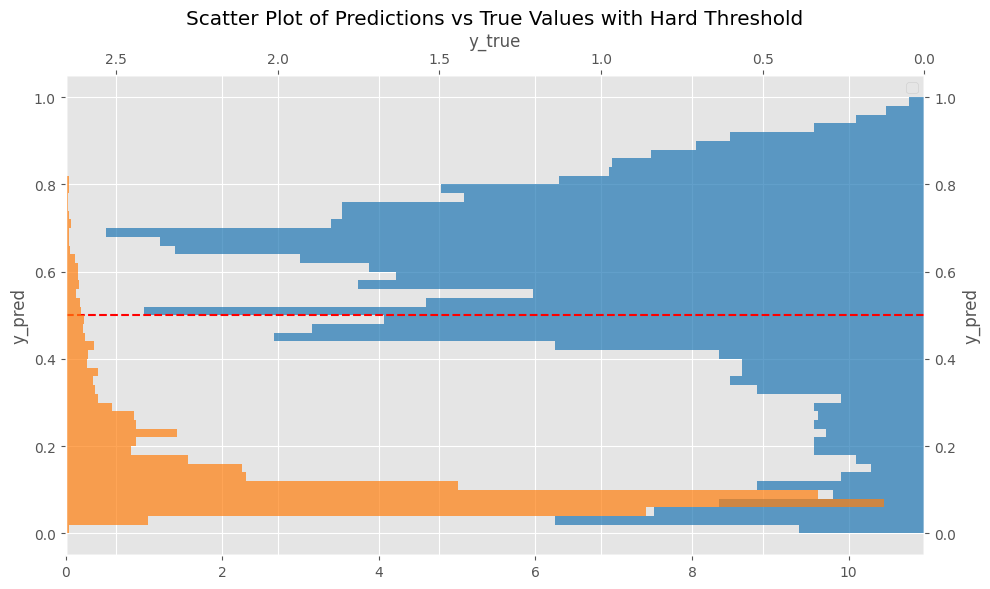

In [92]:
y_pos = norm(y_pos)
y_neg = norm(y_neg)

pos_neg_hist(y_pos, y_neg)

<function matplotlib.pyplot.show(close=None, block=None)>

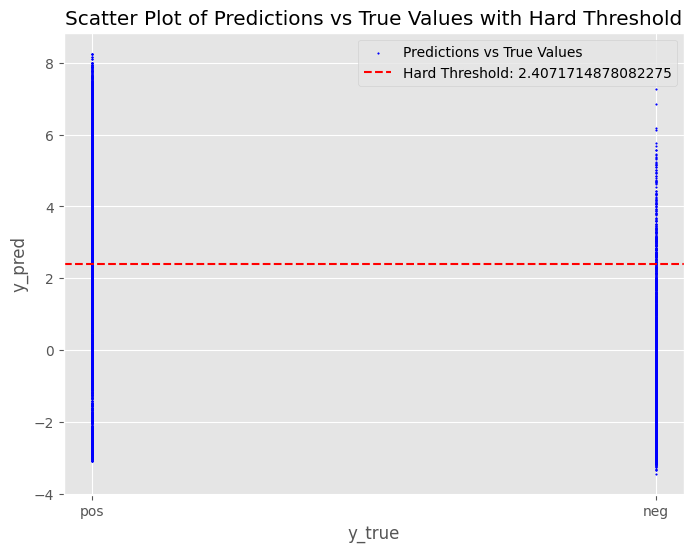

In [93]:
data = np.load('./data_seal.npz')
data1 = data['pos_pred']
data2 = data['neg_pred']

y_pred = np.concatenate([data1, data2])
y_true = np.array(['pos'] * len(data1) + ['neg'] * len(data2))
hard_thres = (max(y_pred)+min(y_pred))/2
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', s=1, label='Predictions vs True Values')
plt.axhline(y=hard_thres, color='red', linestyle='--', label=f'Hard Threshold: {hard_thres.item()}')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Scatter Plot of Predictions vs True Values with Hard Threshold')
plt.legend()
plt.grid(True)
plt.show

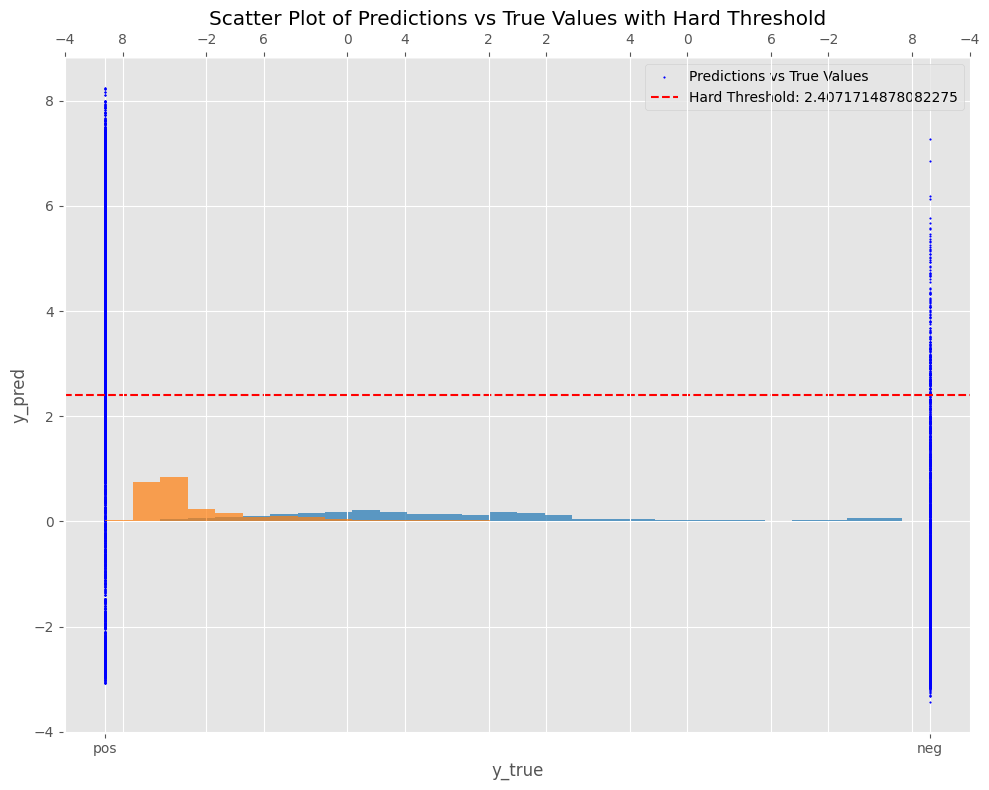

In [98]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load('./data_seal.npz')
data1 = data['pos_pred']
data2 = data['neg_pred']

y_pred = np.concatenate([data1, data2])
y_true = np.array(['pos'] * len(data1) + ['neg'] * len(data2))
hard_thres = (max(y_pred)+min(y_pred))/2

# 创建主图和左右轴
fig, ax = plt.subplots(figsize=(10, 8))

ax_hist_top = ax.twiny()
ax_hist_bottom = ax.twiny()
# 绘制散点图
ax.scatter(y_true, y_pred, color='blue', s=1, label='Predictions vs True Values')

# 绘制阈值线
ax.axhline(y=hard_thres, color='red', linestyle='--', label=f'Hard Threshold: {hard_thres.item()}')

# 设置标签和标题
ax.set_xlabel('y_true')
ax.set_ylabel('y_pred')
ax.set_title('Scatter Plot of Predictions vs True Values with Hard Threshold')
ax.legend()

# 绘制顶部和底部的直方图
# 调整直方图范围和高度
hist_range = (min(y_pred), max(y_pred))  # 范围
hist_bins = 30  # 柱数
density = True  # 归一化

ax_hist_top.hist(data1, bins=hist_bins, range=hist_range, color='#1f77b4', alpha=0.7, density=density)
ax_hist_bottom.hist(data2, bins=hist_bins, range=hist_range, color='#ff7f0e', alpha=0.7, density=density)

# 调整布局
plt.tight_layout()
plt.show()


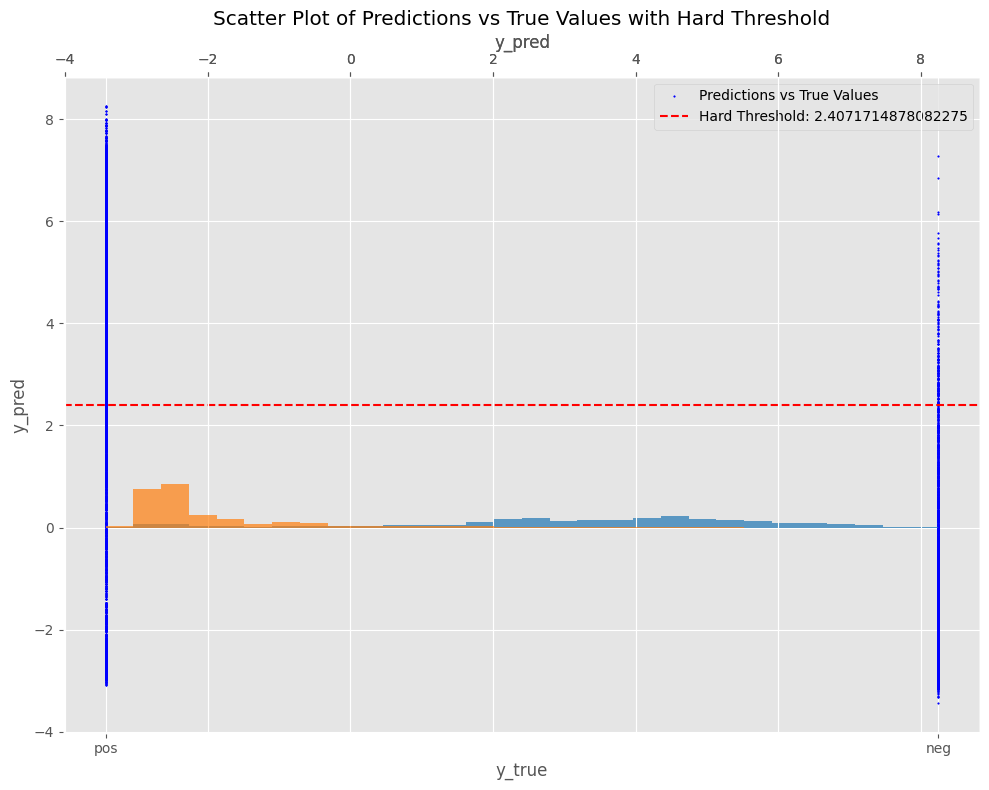

In [99]:
import matplotlib.pyplot as plt
import numpy as np

data = np.load('./data_seal.npz')
data1 = data['pos_pred']
data2 = data['neg_pred']

y_pred = np.concatenate([data1, data2])
y_true = np.array(['pos'] * len(data1) + ['neg'] * len(data2))
hard_thres = (max(y_pred) + min(y_pred)) / 2

# 创建主图和左右轴
fig, ax = plt.subplots(figsize=(10, 8))
ax_hist_top = ax.twiny()
ax_hist_bottom = ax.twiny()

# 绘制散点图
ax.scatter(y_true, y_pred, color='blue', s=1, label='Predictions vs True Values')

# 绘制阈值线
ax.axhline(y=hard_thres, color='red', linestyle='--', label=f'Hard Threshold: {hard_thres.item()}')

# 设置标签和标题
ax.set_xlabel('y_true')
ax.set_ylabel('y_pred')
ax.set_title('Scatter Plot of Predictions vs True Values with Hard Threshold')
ax.legend()

# 绘制顶部和底部的直方图
# 调整直方图范围和高度
hist_range = (min(y_pred), max(y_pred))  # 范围
hist_bins = 30  # 柱数
density = True  # 归一化

# 绘制超过和未超过硬阈值的直方图，分别使用不同的颜色
ax_hist_top.hist(data1, bins=hist_bins, range=hist_range, color='#1f77b4', alpha=0.7, density=density, label='Over Hard Threshold')
ax_hist_bottom.hist(data2, bins=hist_bins, range=hist_range, color='#ff7f0e', alpha=0.7, density=density, label='Below Hard Threshold')

# 设置顶部和底部直方图的标签
ax_hist_top.set_xlabel('y_pred')
ax_hist_bottom.set_xlabel('y_pred')

# 调整布局
plt.tight_layout()
plt.show()
